In [1]:
"""

PHY 200 Final Project: Modeling Traffic Density with Differential Equations

Date created: 4/26/22
Author: Mallory Justis

The main function takes in user input parameters to be applied to helper functions contained in other modules to produce a traffic density plot, along with plots comparing speed, density and flow. 
This code can be used to compare different speed-density relationships and how their traffic density models differ for different speed limits, lengths of road being observed, and traffic movement time.

"""

'\n\nPHY 200 Final Project: Modeling Traffic Density with Differential Equations\n\nDate created: 4/26/22\nAuthor: Mallory Justis\n\nThe main function takes in user input parameters to be applied to helper functions contained in other modules to produce a traffic density plot, along with plots comparing speed, density and flow. \nThis code can be used to compare different speed-density relationships and how their traffic density models differ for different speed limits, lengths of road being observed, and traffic movement time.\n\n'

In [2]:
#imports
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import calcdensity as cd
import sdrelationship as sd
import plotting as plott

In [3]:
def main():
  """
  
  main function that takes user input parameters and uses helper functions
  
  """
  #speed limit
  v_max = float(input("Enter speed limit (mph): "))
  
  #length of road being observed
  L = float(input("Enter length of road we are observing (miles): "))

  #time range
  T = float(input("Enter duration that stoplight is green (minutes): "))/60

  #maximum density    
  rho_max = 200 #cars/mile/lane 

  #number of discretizations (makes a 10x10 array)
  N = 100

  #empty density array
  rho = np.zeros([N,N], float)
 
  #set boundary condition: there is always a car at the stoplight
  rho[0,:] = 1
    
  #boundary condition to decide dx and dt
  boundary = np.array([L, T]) 
  
  #speed density relationship being used
  name_of_relationship = sd.choose_speed_density()

  #changing values in density array
  rho, speed, rho_list = cd.calc_traffic_density(rho, boundary, N, v_max, rho_max, name_of_relationship)

  #plotting speed density
  py.xlabel("Time")
  py.ylabel("Distance")
  py.imshow(rho)
  py.colorbar()
  plt.show()
    
  #plotting speed, flow, and density graphs
  plott.plotting(speed, rho_list)

Enter speed limit (mph):  65
Enter length of road we are observing (miles):  4
Enter duration that stoplight is green (minutes):  3
Enter speed-density relationship (greenshield, underwood, pipes-munjal):  pipes-munjal
Enter value of n for pipes-munjal model:  5


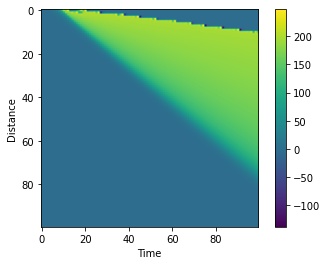

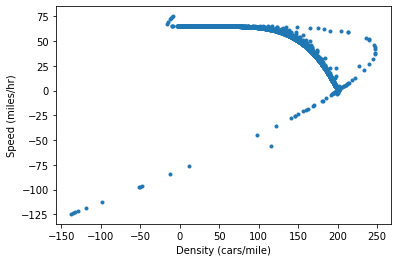

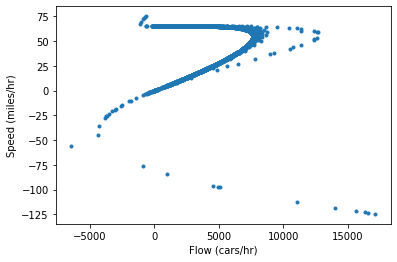

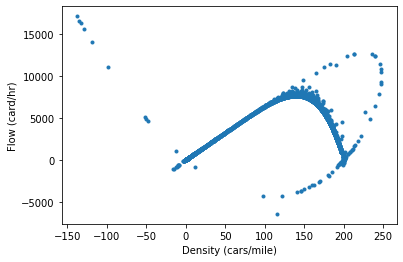

In [7]:
if __name__ == "__main__":
  main()